In [ ]:
import pandas as pd

data_path = '/content/Banglore_traffic_Dataset.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
data.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]  # Display only columns with missing values

,0


In [ ]:
# Convert timestamp column (replace 'timestamp_column' with actual column name)
data['Date'] = pd.to_datetime(data['Date'])

# Extract useful time features
data['hour'] = data['Date'].dt.hour
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['weekday'] = data['Date'].dt.weekday  # Monday = 0, Sunday = 6

# Drop original timestamp column if not needed
data.drop(columns=['Date'], inplace=True)

In [ ]:
# Check for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Convert categorical columns to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Verify changes
data.head()

Categorical columns: Index(['Area Name', 'Road/Intersection Name', 'Weather Conditions',
       'Roadwork and Construction Activity'],
      dtype='object')


,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,hour,day,month,weekday
0,2,0,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,0,0,0,1,1,5
1,2,3,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,0,0,0,1,1,5
2,6,8,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,0,0,0,1,1,5
3,4,11,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,0,0,0,1,1,5
4,4,9,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,0,0,0,1,1,5


In [ ]:
# Remove duplicate rows if any
data = data.drop_duplicates()
print("Shape after removing duplicates:", data.shape)

Shape after removing duplicates: (8936, 19)


In [ ]:
# Select input features (X) and target variable (y)
X = data.drop(columns=['Travel Time Index'])  # Dropping the target column
y = data['Travel Time Index']  # Our target variable

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]  # Display only columns with missing values

,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display scaled values
X_scaled[:5]

array([[-0.77474967, -1.46591956,  1.64247507,  1.00711962,  0.81514828,
         0.48067702, -1.10593338,  1.64247507,  1.26417889,  0.35343846,
         0.71124472, -0.09598748, -0.6993093 , -0.33092416,  0.        ,
        -1.6533171 , -1.49181778,  1.0029434 ],
       [-0.77474967, -0.83282028,  0.1222169 , -0.94056568,  0.81514828,
         0.48067702, -0.4016919 ,  0.1222169 , -0.15646559,  0.98898843,
        -1.05297673, -0.39481515, -0.6993093 , -0.33092416,  0.        ,
        -1.6533171 , -1.49181778,  1.0029434 ],
       [ 1.23371075,  0.22234519, -1.67963323,  1.40351829, -2.22974453,
        -3.35492129, -1.10593338, -1.67963323, -0.0209957 , -1.60342965,
         1.4096054 ,  2.02297239, -0.6993093 , -0.33092416,  0.        ,
        -1.6533171 , -1.49181778,  1.0029434 ],
       [ 0.22948054,  0.85544447,  2.4334862 ,  0.40817489,  0.81514828,
         0.48067702, -0.4016919 ,  2.4334862 , -0.60935947, -0.38009458,
        -0.80425267, -0.09598748, -0.6993093 , -0.330

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify the split sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 7148
Test set size: 1788


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.04009880253513535
Mean Squared Error: 0.005440799755847547
R-squared: 0.7973944850040309


In [ ]:
import xgboost as xgb

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Absolute Error: {mae_xgb}")
print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R-squared: {r2_xgb}")

XGBoost - Mean Absolute Error: 0.044198397590126476
XGBoost - Mean Squared Error: 0.006423916840094353
XGBoost - R-squared: 0.760784987854079


In [ ]:
import lightgbm as lgb

# Initialize the LightGBM Regressor
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM - Mean Absolute Error: {mae_lgb}")
print(f"LightGBM - Mean Squared Error: {mse_lgb}")
print(f"LightGBM - R-squared: {r2_lgb}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2268
[LightGBM] [Info] Number of data points in the train set: 7148, number of used features: 17
[LightGBM] [Info] Start training from score 1.374431
LightGBM - Mean Absolute Error: 0.041779756976149635
LightGBM - Mean Squared Error: 0.0057651672913778505
LightGBM - R-squared: 0.7853156262823037


In [ ]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor
svr_model = SVR(kernel='rbf')  # rbf is a common kernel choice for non-linear relationships

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - Mean Absolute Error: {mae_svr}")
print(f"SVR - Mean Squared Error: {mse_svr}")
print(f"SVR - R-squared: {r2_svr}")

SVR - Mean Absolute Error: 0.0789199393276273
SVR - Mean Squared Error: 0.01005622363110639
SVR - R-squared: 0.6255244708270724


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN - Mean Absolute Error: {mae_knn}")
print(f"KNN - Mean Squared Error: {mse_knn}")
print(f"KNN - R-squared: {r2_knn}")

KNN - Mean Absolute Error: 0.06010485369718634
KNN - Mean Squared Error: 0.010501826749982105
KNN - R-squared: 0.608931018865053


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Mean Absolute Error: {mae_lr}")
print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R-squared: {r2_lr}")

Linear Regression - Mean Absolute Error: 0.06606658704808771
Linear Regression - Mean Squared Error: 0.009434129434643194
Linear Regression - R-squared: 0.6486901304187469


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - Mean Absolute Error: {mae_dt}")
print(f"Decision Tree - Mean Squared Error: {mse_dt}")
print(f"Decision Tree - R-squared: {r2_dt}")

Decision Tree - Mean Absolute Error: 0.05341686248856409
Decision Tree - Mean Squared Error: 0.010667135746940405
Decision Tree - R-squared: 0.6027752116372264


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)

# Train the model
ada_model.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada_model.predict(X_test)

# Evaluate the model
mae_ada = mean_absolute_error(y_test, y_pred_ada)
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print(f"AdaBoost - Mean Absolute Error: {mae_ada}")
print(f"AdaBoost - Mean Squared Error: {mse_ada}")
print(f"AdaBoost - R-squared: {r2_ada}")

AdaBoost - Mean Absolute Error: 0.03966737624888713
AdaBoost - Mean Squared Error: 0.005257985431104825
AdaBoost - R-squared: 0.804202158889351


In [ ]:
# Storing model names and evaluation metrics
models = [
    ("Random Forest", mae, mse, r2),
    ("XGBoost", mae_xgb, mse_xgb, r2_xgb),
    ("LightGBM", mae_lgb, mse_lgb, r2_lgb),
    ("SVR", mae_svr, mse_svr, r2_svr),
    ("KNN", mae_knn, mse_knn, r2_knn),
    ("Linear Regression", mae_lr, mse_lr, r2_lr),
    ("Decision Tree", mae_dt, mse_dt, r2_dt),
    ("AdaBoost", mae_ada, mse_ada, r2_ada)
]

# Display comparison table
import pandas as pd

# Creating a DataFrame for easy visualization
model_comparison = pd.DataFrame(models, columns=["Model", "MAE", "MSE", "R²"])

# Sorting by R² (higher is better) and displaying the comparison
model_comparison = model_comparison.sort_values(by="R²", ascending=False)
model_comparison

,Model,MAE,MSE,R²
7,AdaBoost,0.039667,0.005258,0.804202
0,Random Forest,0.040099,0.005441,0.797394
2,LightGBM,0.041780,0.005765,0.785316
1,XGBoost,0.044198,0.006424,0.760785
5,Linear Regression,0.066067,0.009434,0.648690
3,SVR,0.078920,0.010056,0.625524
4,KNN,0.060105,0.010502,0.608931
6,Decision Tree,0.053417,0.010667,0.602775


In [ ]:
# Finding the model with the highest R² value
best_model = model_comparison.iloc[0]

# Printing the best model's details
print("Best Model Based on R²:")
print(f"Model: {best_model['Model']}")
print(f"R²: {best_model['R²']}")
print(f"MAE: {best_model['MAE']}")
print(f"MSE: {best_model['MSE']}")

Best Model Based on R²:
Model: AdaBoost
R²: 0.804202158889351
MAE: 0.03966737624888713
MSE: 0.005257985431104825


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR

# Load the dataset
file_path = "/content/Banglore_traffic_Dataset.csv"
df = pd.read_csv(file_path)

# Select independent and dependent variables
X = df[[
    "Average Speed", "Travel Time Index", "Congestion Level",
    "Road Capacity Utilization", "Incident Reports", "Environmental Impact",
    "Public Transport Usage", "Traffic Signal Compliance", "Parking Usage",
    "Pedestrian and Cyclist Count"
]]
y = df["Traffic Volume"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "DTR": DecisionTreeRegressor(),
    "RFR": RandomForestRegressor(),
    "LR": LinearRegression(),
    "GBR": GradientBoostingRegressor(),
    "SVR": SVR(),
    "VR": VotingRegressor(estimators=[
        ('rf', RandomForestRegressor()), ('gb', GradientBoostingRegressor())])
}

# Train models and store predictions
predictions = {"ID": X_test.index, "Price": y_test}  # Store actual values

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

# Convert to DataFrame for display
df_results = pd.DataFrame(predictions)

# Display the first 10 rows
print(df_results.head(10))


        ID  Price      DTR       RFR       LR           GBR           SVR  \
554    554  47746  47742.0  47734.78  47746.0  47927.893914  27984.579456   
6304  6304  43420  43423.0  43429.28  43420.0  43340.355532  27985.366166   
1330  1330  22824  22823.0  22823.01  22824.0  22870.322762  27187.068514   
6884  6884  22899  22900.0  22896.87  22899.0  22910.265762  27111.968512   
4801  4801  17274  17266.0  17262.50  17274.0  17271.023891  26991.554223   
6752  6752  26463  26464.0  26464.21  26463.0  26411.673763  27343.759647   
8524  8524  15703  15707.0  15710.52  15703.0  15725.950307  26925.110567   
6253  6253  26660  26681.0  26656.36  26660.0  26601.438992  27482.279846   
7371  7371  26571  26579.0  26572.06  26571.0  26603.393598  27362.305009   
8473  8473  40360  40361.0  40360.91  40360.0  40304.717098  27916.996291   

                VR  
554   47833.756957  
6304  43383.917766  
1330  22847.126381  
6884  22905.222881  
4801  17267.271946  
6752  26437.196881  
8524 

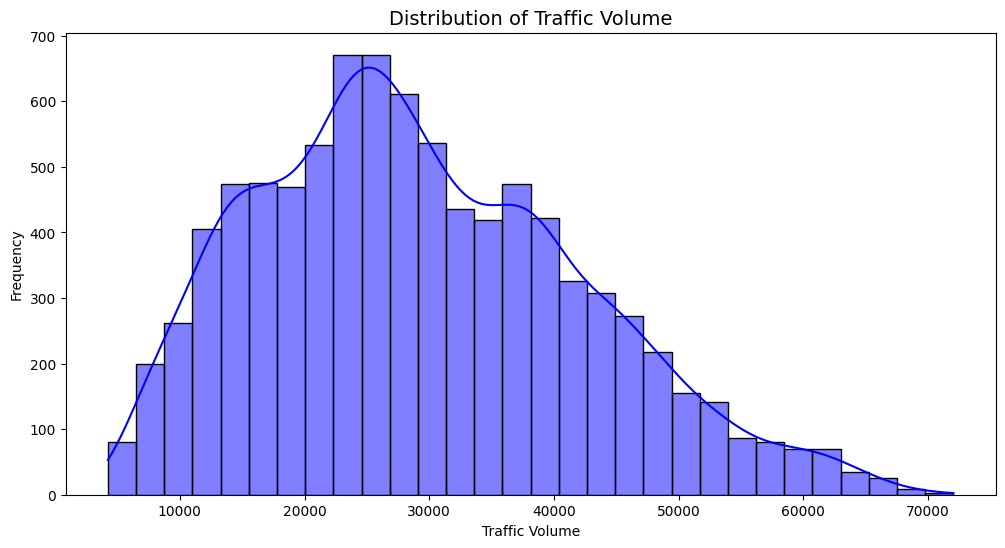

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df["Traffic Volume"], bins=30, kde=True, color="blue")
plt.title("Distribution of Traffic Volume", fontsize=14)
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.show()

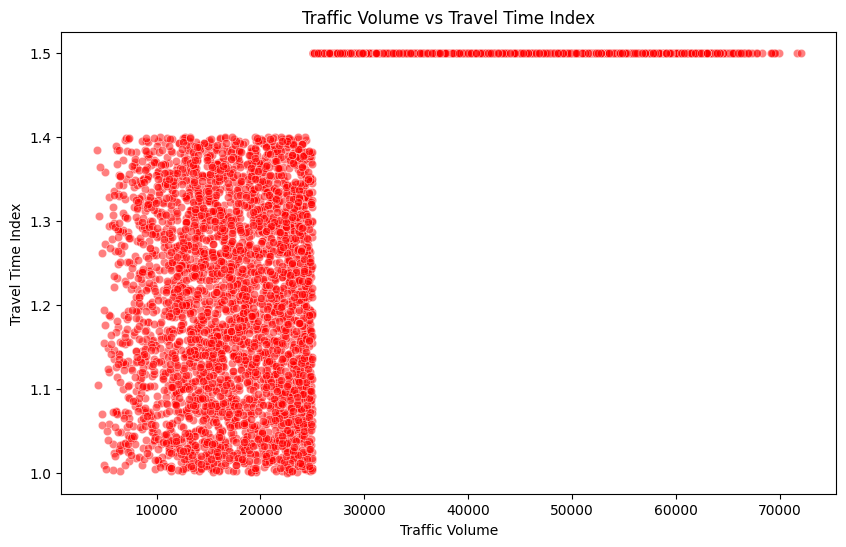

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Traffic Volume"], y=df["Travel Time Index"], alpha=0.5, color="red")
plt.title("Traffic Volume vs Travel Time Index")
plt.xlabel("Traffic Volume")
plt.ylabel("Travel Time Index")
plt.show()

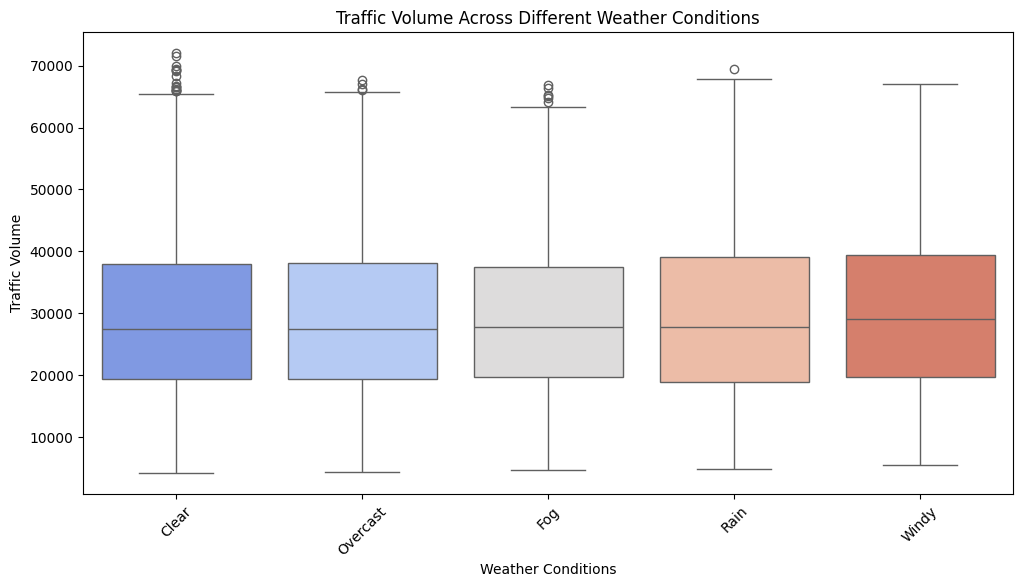

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Weather Conditions"], y=df["Traffic Volume"], palette="coolwarm")
plt.title("Traffic Volume Across Different Weather Conditions")
plt.xticks(rotation=45)
plt.show()

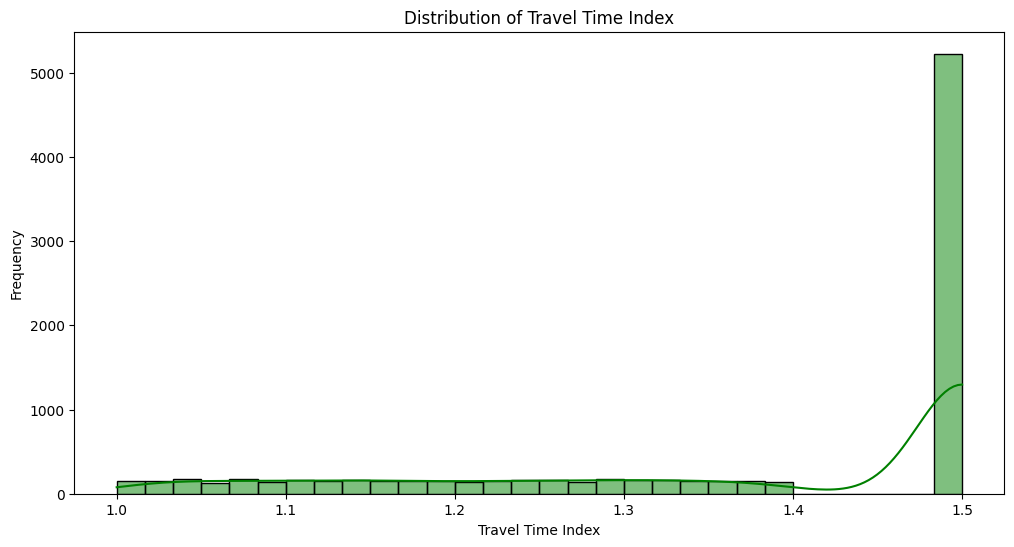

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Travel Time Index"], bins=30, kde=True, color="green")
plt.title("Distribution of Travel Time Index")
plt.xlabel("Travel Time Index")
plt.ylabel("Frequency")
plt.show()

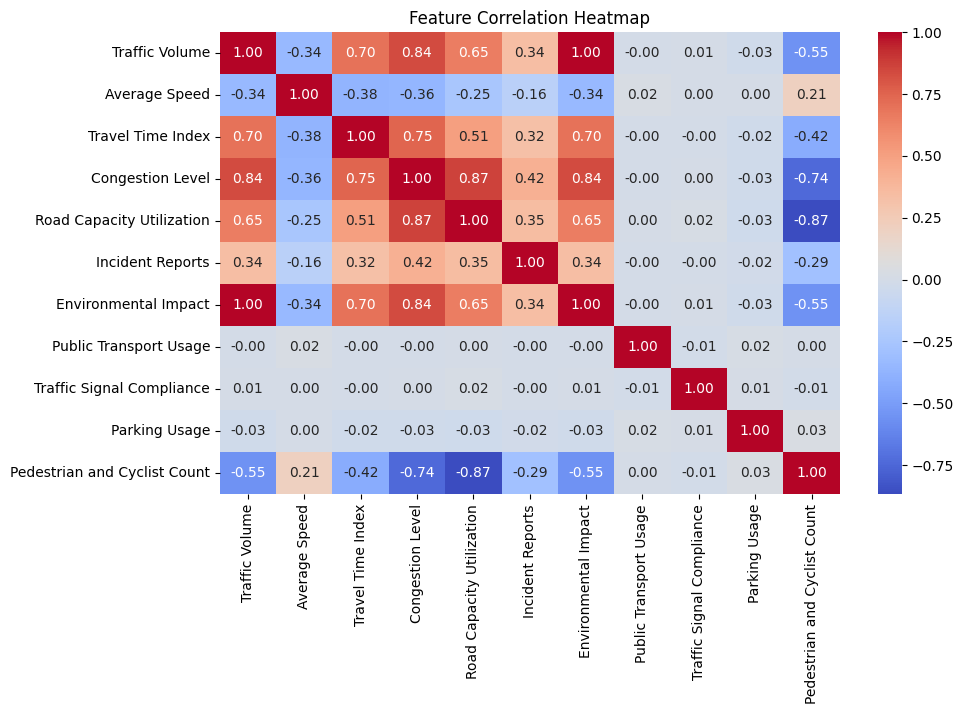

In [ ]:
plt.figure(figsize=(10, 6))
# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

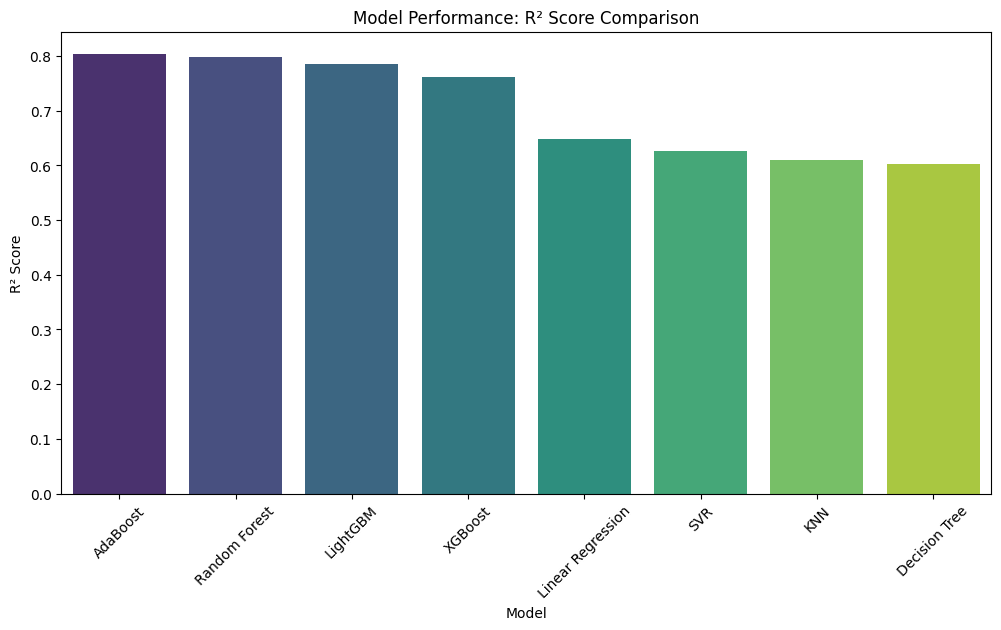

In [ ]:
# Assuming you have a DataFrame `model_comparison` with model names and R² scores
plt.figure(figsize=(12, 6))
sns.barplot(x=model_comparison["Model"], y=model_comparison["R²"], palette="viridis")
plt.title("Model Performance: R² Score Comparison")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.show()

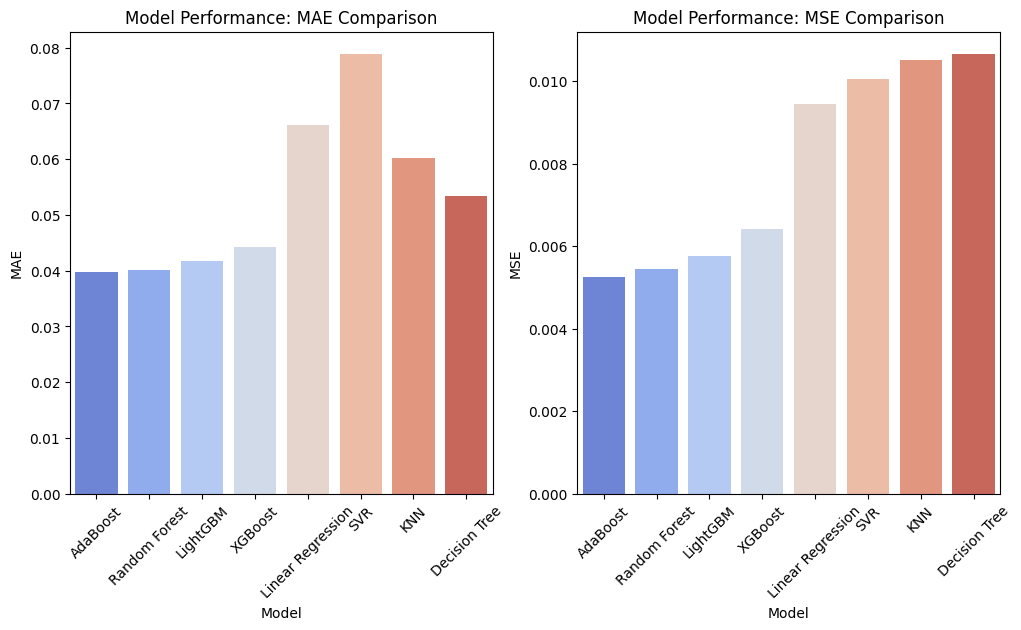

In [ ]:
plt.figure(figsize=(12, 6))

# Plot MAE
plt.subplot(1, 2, 1)
sns.barplot(x=model_comparison["Model"], y=model_comparison["MAE"], palette="coolwarm")
plt.title("Model Performance: MAE Comparison")
plt.xticks(rotation=45)

# Plot MSE
plt.subplot(1, 2, 2)
sns.barplot(x=model_comparison["Model"], y=model_comparison["MSE"], palette="coolwarm")
plt.title("Model Performance: MSE Comparison")
plt.xticks(rotation=45)

plt.show()

In [ ]:
import pandas as pd

# Creating a DataFrame to store model performances
model_comparison = pd.DataFrame({
    "Model": ["AdaBoost", "Random Forest", "LightGBM", "XGBoost",
              "Linear Regression", "SVR", "KNN", "Decision Tree"],
    "R²": [r2_ada, r2, r2_lgb, r2_xgb, r2_lr, r2_svr, r2_knn, r2_dt],
    "MAE": [mae_ada, mae, mae_lgb, mae_xgb, mae_lr, mae_svr, mae_knn, mae_dt],
    "MSE": [mse_ada, mse, mse_lgb, mse_xgb, mse_lr, mse_svr, mse_knn, mse_dt]
})

# Sorting models by highest R² score
best_model = model_comparison.sort_values(by="R²", ascending=False).iloc[0]

# Displaying the results
print("🚀 Model Performance Comparison:\n")
print(model_comparison.sort_values(by="R²", ascending=False))

print("\n🏆 Best Model:")
print(f"📌 Model: {best_model['Model']}")
print(f"📈 R² Score: {best_model['R²']:.4f}")
print(f"📉 MAE: {best_model['MAE']:.4f}")
print(f"🔻 MSE: {best_model['MSE']:.4f}")


🚀 Model Performance Comparison:

               Model        R²       MAE       MSE
0           AdaBoost  0.804202  0.039667  0.005258
1      Random Forest  0.797394  0.040099  0.005441
2           LightGBM  0.785316  0.041780  0.005765
3            XGBoost  0.760785  0.044198  0.006424
4  Linear Regression  0.648690  0.066067  0.009434
5                SVR  0.625524  0.078920  0.010056
6                KNN  0.608931  0.060105  0.010502
7      Decision Tree  0.602775  0.053417  0.010667

🏆 Best Model:
📌 Model: AdaBoost
📈 R² Score: 0.8042
📉 MAE: 0.0397
🔻 MSE: 0.0053
